**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Add ```/path/to/your/folder``` to load the images

In [2]:
cartoon = cv2.imread("/content/drive/MyDrive/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/drive/MyDrive/images/cartoon_y.jpg")
girl = cv2.imread("/content/drive/MyDrive/images/girl.png") #grayscale image
girl_y = cv2.imread("/content/drive/MyDrive/images/girl_y.jpg")
fingerprint = cv2.imread("/content/drive/MyDrive/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/drive/MyDrive/images/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

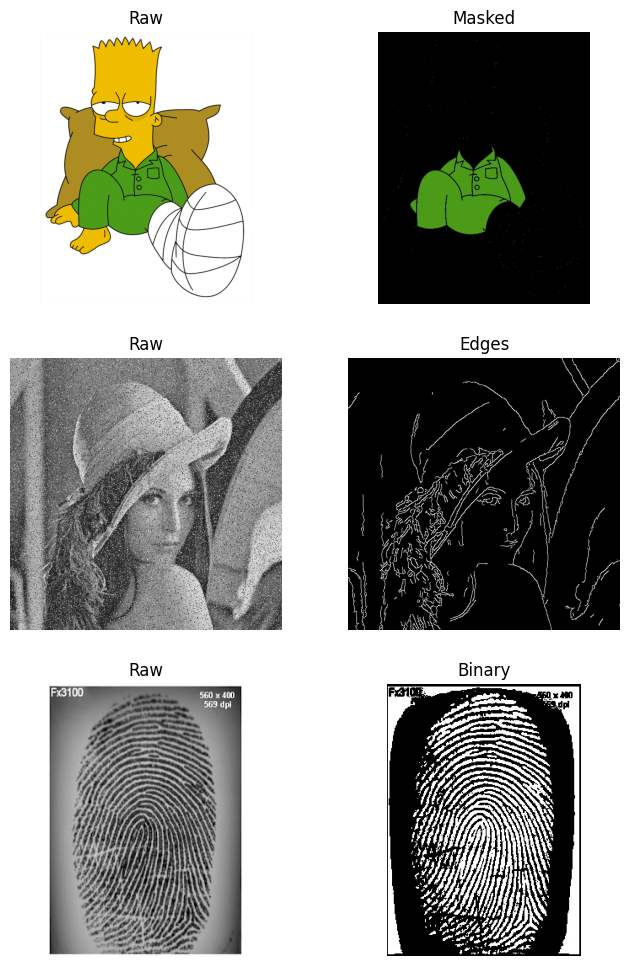

In [3]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

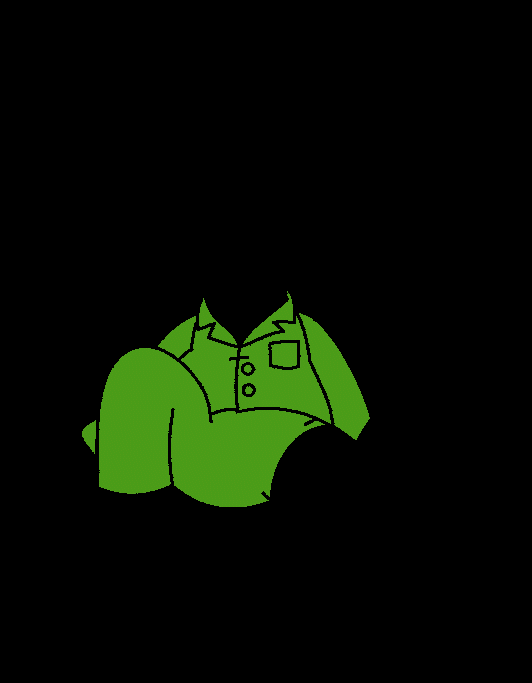

In [80]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/images/cartoon.bmp')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for the dress color in HSV
# Adjust these values based on the actual color of Bart's dress
lower_color = np.array([40, 200, 155])
upper_color = np.array([200, 216, 220])

mask = cv2.inRange(hsv, lower_color, upper_color)

# Invert the mask to get the rest of the image except the dress
mask_inv = cv2.bitwise_not(mask)

# Extract the dress region using the mask
dress_region = cv2.bitwise_and(image, image, mask=mask)

black_background = np.full(image.shape, 0, dtype=np.uint8)

non_dress_region = cv2.bitwise_and(black_background, white_background, mask=mask_inv)

# Combine the dress region with the non-dress regions
cartoon_y_mentee = cv2.add(dress_region, non_dress_region)


cv2_imshow(cartoon_y_mentee)



### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

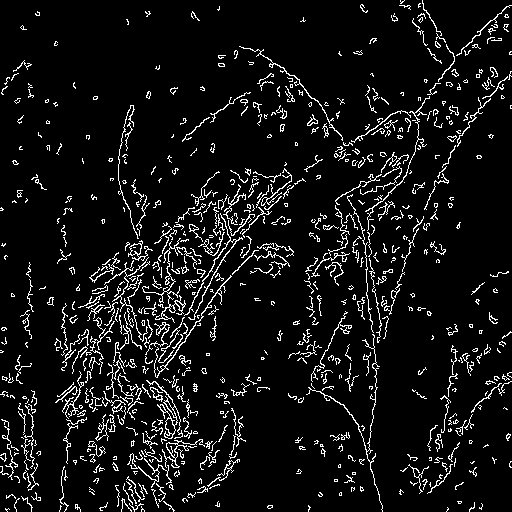

In [81]:
image = cv2.imread('/content/drive/MyDrive/images/girl.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred_image, 100, 200)

# Convert edges to a 3 channel image
girl_y_mentee = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

cv2_imshow(girl_y_mentee)



### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

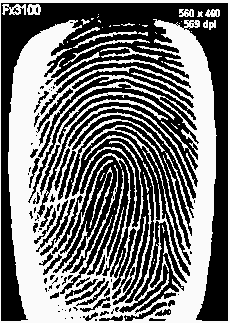

In [92]:
image = cv2.imread('/content/drive/MyDrive/images/fingerprint.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, fingerprint_y_mentee = cv2.threshold(gray_image, 127, 250, cv2.THRESH_BINARY)

cv2_imshow(fingerprint_y_mentee)


## Comparison

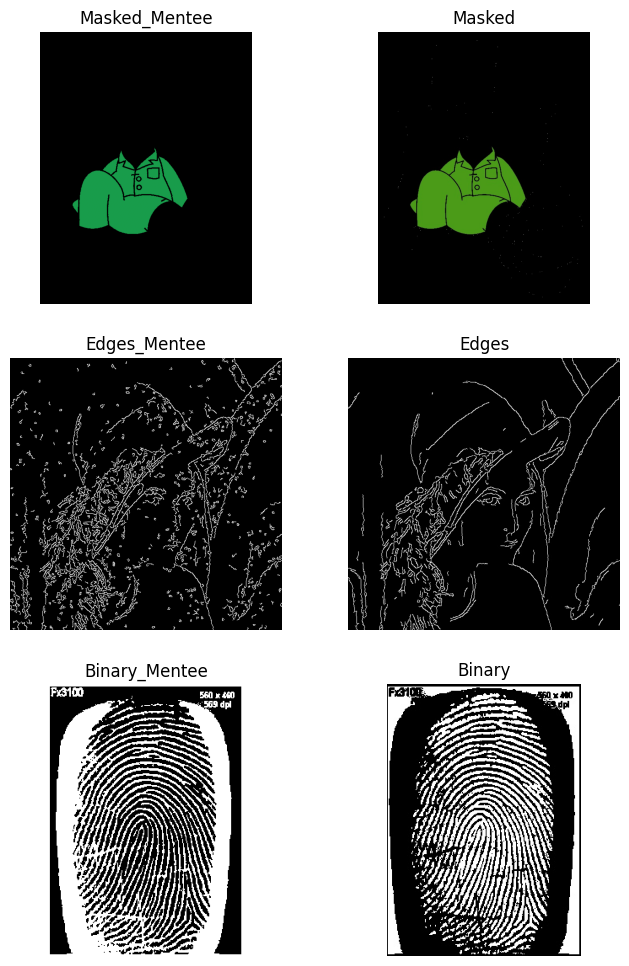

In [93]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()